# Lecture 21:  A proper numerical scheme for the solution of the latitude EBM

It turns out that the numerical method used in Lecture 17, titled "The sledgehammer" approach is flawed! The flaw is subtle, but will be mentioned in lectures and in the notes. In this notebook, we design a proper scheme. The proper scheme will make use the material from lecture 18 where we solved for the ice line position. 

Once the ice line position is known, then an explicit formula for the temperature is known.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

Set the parameters according to those given in lectures

In [6]:
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.6*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

# now corrected to match Q6 of PS4
abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.241*(ys**2 - 1))
Tbar = lambda ys, Q: (Q*(1 - abar(ys)) - A)/B 
Tbari = lambda Q: (Q*(1 - ai)- A)/B
Tbarw = lambda Q: (Q*(1 - aw)- A)/B
Qfunc = lambda ys: (Tc + A/B)*(B+k)/(s(ys)*(1 - (ai+aw)/2) + k/B*(1 - abar(ys)))

def afun(y, ys): 
    # albedo function; if T > Tc, set a = aw, elseif T < Tc, a = ai
    a = 0*y
    for i, yy in enumerate(y):
        if yy < ys:
            aa = aw
        elif yy > ys:
            aa = ai
        else:
            aa = (ai+aw)/2
        a[i] = aa
    return a

T = lambda y, ys, Q: (k*Tbar(ys,Q) + Q*s(y)*(1 - afun(y,ys)) - A)/(B+k);
T1 = lambda y, Q: Q/(B+k)*(s(y)*(1-aw) + k/B*(1-aw))-A/B;
T2 = lambda y, Q: Q/(B+k)*(s(y)*(1-ai) + k/B*(1-ai))-A/B;

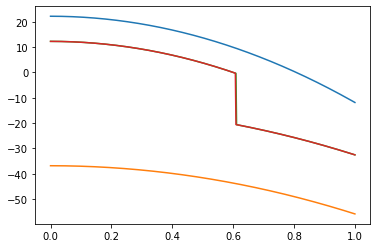

In [5]:
# Let's plot the solutions at Q = 343
y = np.linspace(0,1,500);
Q0 = 342;
plt.plot(y, T1(y, Q0))
plt.plot(y, T2(y, Q0))

fwd = lambda ys: Qfunc(ys) - Q0;
sol = root(fwd, 0.95); solys = sol.x[0];
plt.plot(y, T(y, solys, Q0))

fwd = lambda ys: Qfunc(ys) - Q0;
sol = root(fwd, 0.2); solys = sol.x[0];
plt.plot(y, T(y, solys, Q0))

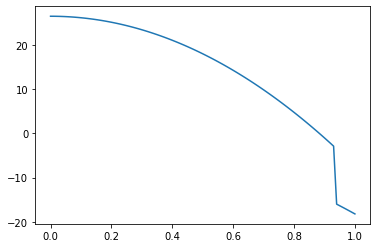

In [40]:
plt.plot(y,T)

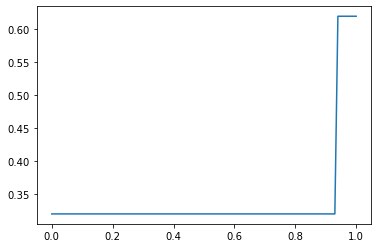

In [41]:
plt.plot(y, afunc(T))